In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import pickle
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE

### Parámetros

In [2]:
P_estrategia='RandomOverSampler'
#P_estrategia='SMOTE'
P_learning_rate=0.1 
P_batch_size=100
P_epochs=5

In [3]:
import os

#Se establece una semilla para la reproducibilidad de los resultados
valor=123456
os.environ['PYTHONHASHSEED']=str(valor)
import tensorflow as tf
import random
tf.random.set_seed(valor)
np.random.seed(valor)
random.seed(valor)


In [4]:
pd.options.display.max_columns=1000

In [5]:
f = open('filePickleEstruct.pkl','rb')
df = pickle.load(f)
f.close
df.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V12,V13,V19,V20,V29,V30,V53,V54,V56,V60,V61,V62,V64,V69,V70,V282,V283,V290,V291,V292,V302,V303,V304,V310,V315,V317,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.002137,590539.0,0.743044,0.525111,0.381679,590490.0,0.306569,590539.0,0.488636,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000627,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000873,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000900,590539.0,0.100885,0.608000,0.381679,590539.0,0.014599,590539.0,0.511364,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.0,0.000343,0.0007,0.000000,0.000000,0.142857,0.066667,0.000000,0.00000,0.000000,0.000000,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.001840,590539.0,0.210566,0.780000,0.381679,590535.0,0.481752,590538.0,0.522727,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.001558,590539.0,0.984824,0.934000,0.381679,590539.0,0.124088,590538.0,0.854545,0.836957,0.000427,0.000879,0.0,0.0,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.008568,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.006422,0.0,0.010476,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.001558,590506.0,0.201023,0.828000,0.381679,590539.0,0.014599,590539.0,0.727273,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.0,0.000343,0.0007,0.186570,0.099861,0.116624,0.056523,0.077568,0.04516,0.115517,0.103330,0.021980,0.008909,0.138297,0.086756,0.020261,0.07804,0.067987,0.03125,0.014706,0.0,0.0,0.0,0.0625,0.05,0.0625,0.000000,0.0,0.000000,1.000000,0.070815,0.593674,0.933013,1.000000,144232.0,0.704687,144232.0,144232.0,0.511628,0.774081,0.078431,144232.0,144232.0,141698.0,144231.0,144232.0,144232.0,144226.0,144232.0,0


In [6]:
dataX=df.drop('isFraud',axis=1)
tarjetY=df[['isFraud']]

In [7]:
X2_train, X2_test, y2_train, y2_test \
= train_test_split(dataX, tarjetY, stratify=tarjetY, test_size=0.1, random_state=0)#Separar en entrenamiento y test

if P_estrategia=='SMOTE':
    ros = SMOTE(sampling_strategy='minority')#Se aumenta el conjunto de datos training
    dataX2, tarjetY2 = ros.fit_resample(X2_train, y2_train)#Se separa en training y validation    
else:
    ros = RandomOverSampler(sampling_strategy='minority')#Se aumenta el conjunto de datos training
    dataX2, tarjetY2 = ros.fit_resample(X2_train, y2_train)#Se separa en training y validation

X3_train, X3_test, y3_train, y3_test \
= train_test_split(dataX2, tarjetY2, stratify=tarjetY2, test_size=0.2, random_state=0)


In [8]:
#Arquitectura 1
model1 = models.Sequential()
model1.add(layers.Dense(2,activation='tanh'))
model1.add(layers.Dense(7,activation='tanh'))      
model1.add(layers.Dense(1,activation='sigmoid'))


model1.compile( loss= keras.losses.binary_crossentropy,
                optimizer = keras.optimizers.Adam(learning_rate = P_learning_rate),
                metrics = [tf.keras.metrics.AUC(),'accuracy'])

In [9]:
model1.fit(x=X3_train,y=y3_train.values,epochs=5,batch_size=P_batch_size,validation_data=(X3_test,y3_test)) 

Epoch 1/5
8207/8207 [==============================] - 8s 912us/step - loss: 0.6451 - auc: 0.6567 - accuracy: 0.6552 - val_loss: 0.6443 - val_auc: 0.6564 - val_accuracy: 0.6564
Epoch 2/5
8207/8207 [==============================] - 7s 886us/step - loss: 0.6468 - auc: 0.6572 - accuracy: 0.6544 - val_loss: 0.6403 - val_auc: 0.6564 - val_accuracy: 0.6564
Epoch 3/5
8207/8207 [==============================] - 8s 933us/step - loss: 0.6470 - auc: 0.6569 - accuracy: 0.6539 - val_loss: 0.6436 - val_auc: 0.6564 - val_accuracy: 0.6564
Epoch 4/5
8207/8207 [==============================] - 7s 872us/step - loss: 0.6471 - auc: 0.6569 - accuracy: 0.6536 - val_loss: 0.6457 - val_auc: 0.6564 - val_accuracy: 0.6564
Epoch 5/5
8207/8207 [==============================] - 7s 875us/step - loss: 0.6474 - auc: 0.6564 - accuracy: 0.6542 - val_loss: 0.6563 - val_auc: 0.6564 - val_accuracy: 0.6564


In [10]:
#Arquitectura 2
model2 = models.Sequential()
model2.add(layers.Dense(2,activation='tanh'))
model2.add(layers.Dense(200,activation='tanh'))
model2.add(layers.Dense(300,activation='tanh'))
model2.add(layers.Dense(400,activation='tanh'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile( loss= keras.losses.binary_crossentropy,
                optimizer = keras.optimizers.Adam(learning_rate = P_learning_rate),
                metrics = [tf.keras.metrics.AUC(),'accuracy'])

In [11]:
history2=model2.fit(x=X3_train,y=y3_train.values,epochs=5,batch_size=P_batch_size,validation_data=(X3_test,y3_test)) 

Epoch 1/5
8207/8207 [==============================] - 15s 2ms/step - loss: 11.6346 - auc_1: 0.4997 - accuracy: 0.4996 - val_loss: 0.7372 - val_auc_1: 0.5000 - val_accuracy: 0.5000
Epoch 2/5
8207/8207 [==============================] - 14s 2ms/step - loss: 11.0610 - auc_1: 0.5015 - accuracy: 0.5013 - val_loss: 5.8204 - val_auc_1: 0.5000 - val_accuracy: 0.5000
Epoch 3/5
8207/8207 [==============================] - 14s 2ms/step - loss: 11.1488 - auc_1: 0.4993 - accuracy: 0.4995 - val_loss: 12.0701 - val_auc_1: 0.5000 - val_accuracy: 0.5000
Epoch 4/5
8207/8207 [==============================] - 14s 2ms/step - loss: 10.9140 - auc_1: 0.4993 - accuracy: 0.4991 - val_loss: 7.9541 - val_auc_1: 0.5000 - val_accuracy: 0.5000
Epoch 5/5
8207/8207 [==============================] - 14s 2ms/step - loss: 11.1358 - auc_1: 0.4994 - accuracy: 0.4995 - val_loss: 1.4522 - val_auc_1: 0.5000 - val_accuracy: 0.5000


In [12]:
#Arquitectura 3
model3 = models.Sequential()
model3.add(layers.Dense(2,activation='tanh'))
model3.add(layers.Dense(10,activation='tanh'))  
model3.add(layers.Dense(20,activation='tanh'))  
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile( loss= keras.losses.binary_crossentropy,
                optimizer = keras.optimizers.Adam(learning_rate = P_learning_rate),
                metrics = [tf.keras.metrics.AUC(),'accuracy'])

In [13]:
history3=model3.fit(x=X3_train,y=y3_train.values,epochs=5,batch_size=P_batch_size,validation_data=(X3_test,y3_test)) 

Epoch 1/5
8207/8207 [==============================] - 9s 967us/step - loss: 0.7584 - auc_2: 0.4991 - accuracy: 0.4993 - val_loss: 0.7230 - val_auc_2: 0.5004 - val_accuracy: 0.5004
Epoch 2/5
8207/8207 [==============================] - 8s 960us/step - loss: 0.7579 - auc_2: 0.5002 - accuracy: 0.5005 - val_loss: 0.8013 - val_auc_2: 0.5004 - val_accuracy: 0.5004
Epoch 3/5
8207/8207 [==============================] - 8s 949us/step - loss: 0.7589 - auc_2: 0.5013 - accuracy: 0.5012 - val_loss: 0.7954 - val_auc_2: 0.4996 - val_accuracy: 0.4996
Epoch 4/5
8207/8207 [==============================] - 8s 958us/step - loss: 0.7563 - auc_2: 0.5003 - accuracy: 0.4994 - val_loss: 0.7676 - val_auc_2: 0.4996 - val_accuracy: 0.4996
Epoch 5/5
8207/8207 [==============================] - 8s 942us/step - loss: 0.7570 - auc_2: 0.5006 - accuracy: 0.5004 - val_loss: 0.7036 - val_auc_2: 0.5004 - val_accuracy: 0.5004


#### Predicciones sobre el conjunto de datos de test

In [11]:
predicciones=model1.predict(X2_test)

1846/1846 [==============================] - 1s 484us/step


In [12]:
score = metrics.roc_auc_score(y2_test, predicciones)

In [13]:
print(score)

0.6569814276553935


In [14]:
print(predicciones)

[[0.29319388]
 [0.29319388]
 [0.29319388]
 ...
 [0.29319388]
 [0.29319388]
 [0.29319388]]


In [15]:
for p in predicciones:
    print(p)

[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]

[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]

[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]

[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]

[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]

[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]

[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]

[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]

[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]

[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]

[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.61316216]

[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]

[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.61316216]
[0.61316216]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]
[0.29319388]
[0.61316216]
[0.29319388]

In [16]:
dfFraudeNoFraude = np.where(predicciones >= 0.5, 1, 0)
df_predicciones = pd.DataFrame(dfFraudeNoFraude, columns=['Fraude'])
df_predicciones

,Fraude
0,0
1,0
2,0
3,1
4,1
...,...
59049,0
59050,0
59051,0
59052,0


In [17]:
filePickleT = open('tensorFlow.pkl','wb')
pickle.dump(y2_test,filePickleT)
filePickleT.close()

In [18]:
import pickle

filePickle = open('tensorFlowPredicciones.pkl','wb')
pickle.dump(df_predicciones,filePickle)
filePickle.close()

In [19]:
print("Matriz de confusión:\n%s" % (metrics.confusion_matrix(y2_test, df_predicciones['Fraude'])))
false_positive_rate, true_positive_rate, thresholds  = metrics.roc_curve(y2_test, predicciones)
roc_auc = auc(false_positive_rate, true_positive_rate)

Matriz de confusión:
[[44207 12781]
 [  954  1112]]


MÉTRICAS -->
 AUC: 0.657 ACC: 0.767  PREC: 0.767  RECALL: 0.767  F1: 0.767


<AxesSubplot:title={'center':'Matriz de confusión'}, xlabel='Predicted label', ylabel='True label'>

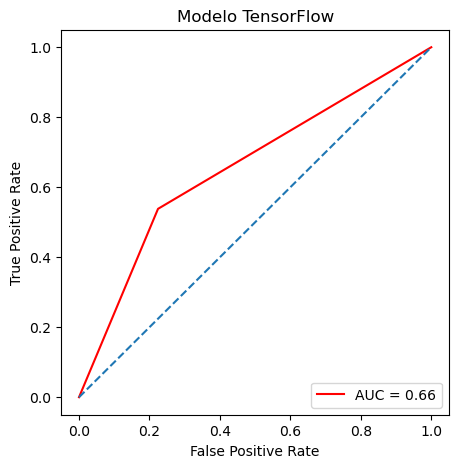

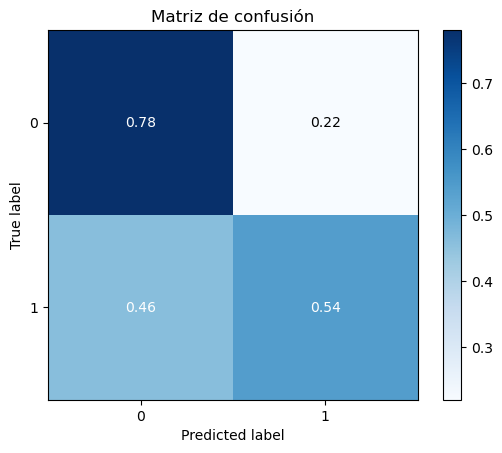

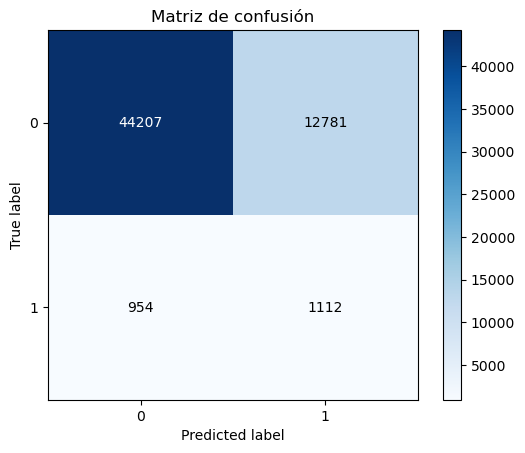

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot as skplt


metricasClas = {
      'AUC': metrics.roc_auc_score,  
      'ACC':    metrics.accuracy_score,
      'PREC':   lambda y_true, y_pred:
                metrics.precision_score(y_true, y_pred,
                  average='micro'), 
      'RECALL': lambda y_true, y_pred:
                metrics.recall_score(y_true, y_pred,
                  average='micro'),
      'F1':     lambda y_true, y_pred:
                metrics.f1_score(y_true, y_pred, average='micro')}


plt.figure(figsize=(5,5))
plt.title('Modelo TensorFlow')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


ACC = metricasClas['ACC'](y2_test, df_predicciones['Fraude'])
PREC = metricasClas['PREC'](y2_test, df_predicciones['Fraude'])
RECALL = metricasClas['RECALL'](y2_test, df_predicciones['Fraude'])
F1 = metricasClas['F1'](y2_test, df_predicciones['Fraude'])

print("%s\n AUC: %.3f ACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
                      ('MÉTRICAS -->',roc_auc, ACC,PREC,RECALL,F1))   



matriz_confusion = confusion_matrix(y2_test, df_predicciones['Fraude'])

skplt.metrics.plot_confusion_matrix(y2_test, df_predicciones['Fraude'], normalize=True, title='Matriz de confusión')
skplt.metrics.plot_confusion_matrix(y2_test, df_predicciones['Fraude'], title='Matriz de confusión')

#### Guardar el modelo

In [22]:
import joblib
filename = 'modelTensorFlow.sav'
joblib.dump(model1, filename)

['modelTensorFlow.sav']

#### Probar que el modelo se haya cargado correctamente

In [23]:
loaded_model = joblib.load(filename)
predicciones2=loaded_model.predict(X2_test)
score2 = metrics.roc_auc_score(y2_test, predicciones)

1846/1846 [==============================] - 1s 507us/step


In [24]:
print(score2)

0.6569814276553935
